         image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

Class Distribution:
 3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64


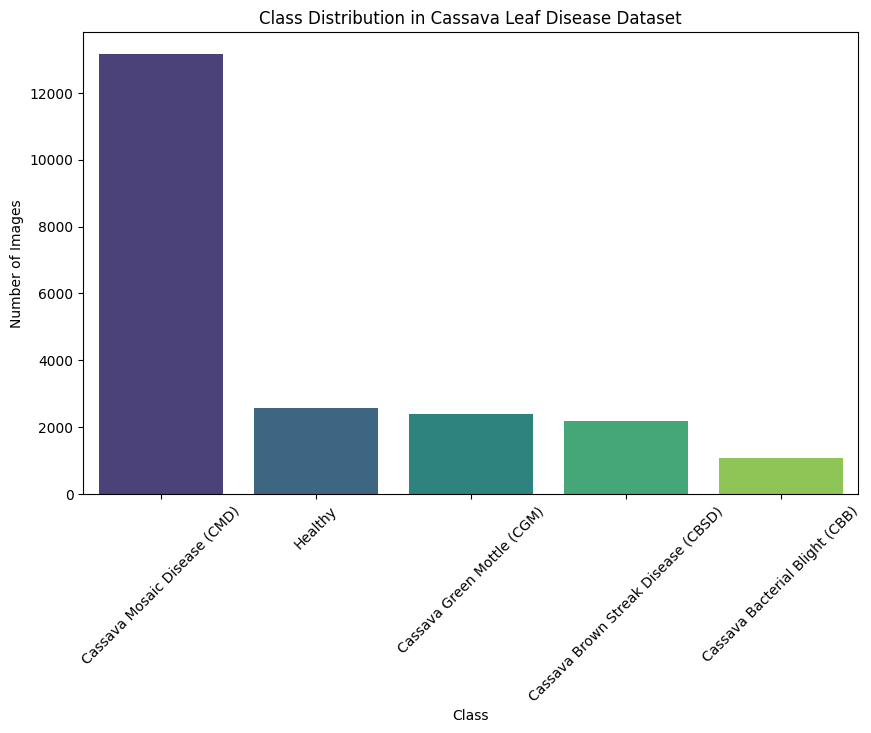

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


classesNames = {
0: "Cassava Bacterial Blight (CBB)",
1: "Cassava Brown Streak Disease (CBSD)",
2: "Cassava Green Mottle (CGM)",
3: "Cassava Mosaic Disease (CMD)",
4: "Healthy"
}
# Load the labels
labels_df = pd.read_csv('/home/dhavalsinh/Desktop/ObjClassification/dataset/CassavaLeafDisease-data/label.csv')

# Display the first few rows of the dataframe
print(labels_df.head())

# Check the distribution of classes
class_distribution = labels_df['label'].value_counts()
print("\nClass Distribution:\n", class_distribution)

# Map class indices to class names
class_distribution.index = class_distribution.index.map(classesNames)

# Plot the class distribution using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution in Cassava Leaf Disease Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Determine the resolution of images in the dataset
image_folder = '/home/dhavalsinh/Desktop/ObjClassification/dataset/CassavaLeafDisease-data/images'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# Load the first image to check its resolution
if image_files:
    first_image_path = os.path.join(image_folder, image_files[0])
    img = plt.imread(first_image_path)
    image_resolution = img.shape[:2]  # (height, width)
    print(f"Resolution of images: {image_resolution[1]}x{image_resolution[0]}")
else:
    print("No images found in the specified directory.")


Resolution of images: 800x600


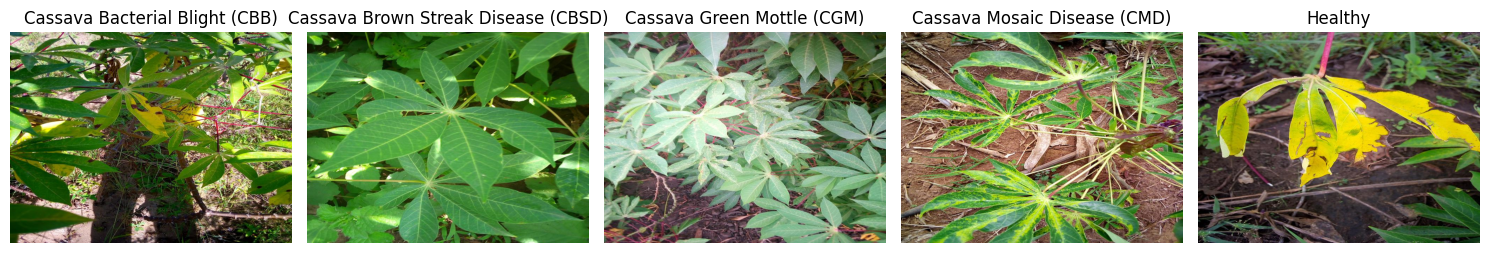

In [9]:
# Display one image from each class in a grid

# Create a figure with subplots
fig, axes = plt.subplots(1, len(classesNames), figsize=(15, 5))

# Iterate over each class
for class_id, class_name in classesNames.items():
    # Get the first image file for the current class
    class_images = labels_df[labels_df['label'] == class_id]['image_id'].values
    if len(class_images) > 0:
        image_path = os.path.join(image_folder, class_images[0])
        img = plt.imread(image_path)
        
        # Display the image in the corresponding subplot
        ax = axes[class_id]
        ax.imshow(img)
        ax.set_title(class_name)
        ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
